# Basic FISSA usage

This notebook contains a step-by-step example of how to use the function-based high-level interface to the [FISSA](https://github.com/rochefort-lab/fissa) toolbox, [fissa.run_fissa](https://fissa.readthedocs.io/en/latest/source/packages/fissa.core.html#fissa.core.run_fissa).

For more details about the methodology behind FISSA, please see our paper:

Keemink, S. W., Lowe, S. C., Pakan, J. M. P., Dylda, E., van Rossum, M. C. W., and Rochefort, N. L. FISSA: A neuropil decontamination toolbox for calcium imaging signals, *Scientific Reports*, **8**(1):3493, 2018. doi: [10.1038/s41598-018-21640-2](https://www.doi.org/10.1038/s41598-018-21640-2).

See [basic_usage_func.py](https://github.com/rochefort-lab/fissa/blob/master/examples/basic_usage_func.py) (or [basic_usage_func_windows.py](https://github.com/rochefort-lab/fissa/blob/master/examples/basic_usage_func_windows.py) for Windows users) for a short example script outside of a notebook interface.

## Import packages

First, we need to import fissa.

In [1]:
# Import the FISSA toolbox
import fissa

We also need to import some plotting dependencies which we'll make use in this notebook to display the results.

In [2]:
# For plotting our results, import numpy and matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Fetch the colormap object for Cynthia Brewer's Paired color scheme
colors = plt.get_cmap("Paired")

## Running FISSA

With the function-based interface to FISSA, everything is handled in a single function call to [fissa.run_fissa](https://fissa.readthedocs.io/en/latest/source/packages/fissa.core.html#fissa.core.run_fissa). The function takes as its input is the raw signals, and returns the decontaminated signals.

The mandatory inputs to [fissa.run_fissa](https://fissa.readthedocs.io/en/latest/source/packages/fissa.core.html#fissa.core.run_fissa) are:

- the experiment images
- the regions of interest (ROIs) to extract

Images can be given as a path to a folder containing tiff stacks:
```python
images = "folder"
```
Each of these tiff-stacks in the folder (e.g. `"folder/trial_001.tif"`) is a trial with many frames.
Although we refer to one trial as an `image`, it is actually a video recording.

Alternatively, the image data can be given as a list of paths to tiffs:
```python
images = ["folder/trial_001.tif", "folder/trial_002.tif", "folder/trial_003.tif"]
```
or as a list of arrays which you have already loaded into memory:
```python
images = [array1, array2, array3, ...]
```

For the regions of interest (ROIs) input, you can either provide a single set of ROIs, or a set of ROIs for every image.

If the ROIs were defined using ImageJ, use ImageJ's export function to save them in a zip.
Then, provide the ROI filename.
```python
rois = "rois.zip"  # for a single set of ROIs used across all images
```
The same set of ROIs will be used for every image in `images`.

Sometimes there is motion between trials causing the alignment of the ROIs to drift.
In such a situation, you may need to use a slightly different location of the ROIs for each trial.
This can be handled by providing FISSA with a list of ROI sets — one ROI set (i.e. one ImageJ zip file) per trial.
```python
rois = ["rois1.zip", "rois2.zip", ...]  # for a unique roiset for each image
```
Please note that the ROIs defined in each ROI set must correspond to the same physical reigons across all trials, and that the order must be consistent.
That is to say, the 1st ROI listed in each ROI set must correspond to the same item appearing in each trial, etc.

In this notebook, we will demonstrate how to use FISSA with ImageJ ROI sets, saved as zip files.
However, you are not restricted to providing your ROIs to FISSA in this format.
FISSA will also accept ROIs which are arbitrarily defined by providing them as arrays (`numpy.ndarray` objects).
ROIs provided in this way can be defined either as boolean-valued masks indicating the presence of a ROI per-pixel in the image, or defined as a list of coordinates defining the boundary of the ROI.
For examples of such usage, see our [Suite2p](https://fissa.readthedocs.io/en/latest/examples/Suite2p%20example.html), [CNMF](https://fissa.readthedocs.io/en/latest/examples/cNMF%20example.html), and [SIMA](https://fissa.readthedocs.io/en/latest/examples/SIMA%20example.html) example notebooks.

As an example, we will run FISSA on a small test dataset.

The test dataset can be found and downloaded from [the examples folder of the fissa repository](https://github.com/rochefort-lab/fissa/tree/master/examples), along with the source for this example notebook.

In [4]:
# Define path to imagery and to the ROI set
images_location = "exampleData/20150529"
rois_location = "exampleData/20150429.zip"

# Call FISSA using the function-based interface
result, raw = fissa.run_fissa(images_location, rois_location)

Extracting traces:   0%|          | 0/3 [00:00<?, ?it/s]

Finished extracting raw signals from 4 ROIs across 3 trials in 1.034 seconds.


Separating data:   0%|          | 0/4 [00:00<?, ?it/s]

Finished separating signals from 4 ROIs across 3 trials in 1.717 seconds


The function-based interface is very straight forward, but note that you can only access the result which is returned by the function.

If you need to access the raw traces, ROI masks, or demixing matrix, you need to use the more flexible object-oriented (class based) interface using [fissa.Experiment](https://fissa.readthedocs.io/en/stable/source/packages/fissa.core.html#fissa.core.Experiment) instead.
An example of this is given in our [object-oriented example usage notebook](https://rochefort-lab.github.io/fissa/examples/Basic%20usage.html).

## Working with results

The output of ``fissa.run_fissa`` is structured as a 2-d array of 2-d arrays (it can't be a 4-d array because of trials generally don't have the same number of frames).

The results from the cell (ROI) numbered `c` and the trial (TIFF) numbered `t` are located at `result[c, t][0, :]`.

The fourth and final dimension works through frames within the TIFF file (time).

The third dimension iterates over output signals.
The 0-th entry of this is the signal which most closely corresponds to the raw signal within the ROI, and is FISSA's best guess for the decontaminated cell source signal.
The other signals are the isolated signals from contaminants such as neuropil and neighbouring cells.

Let's compare the raw signal to the separated signal for a single trial from an example ROI.

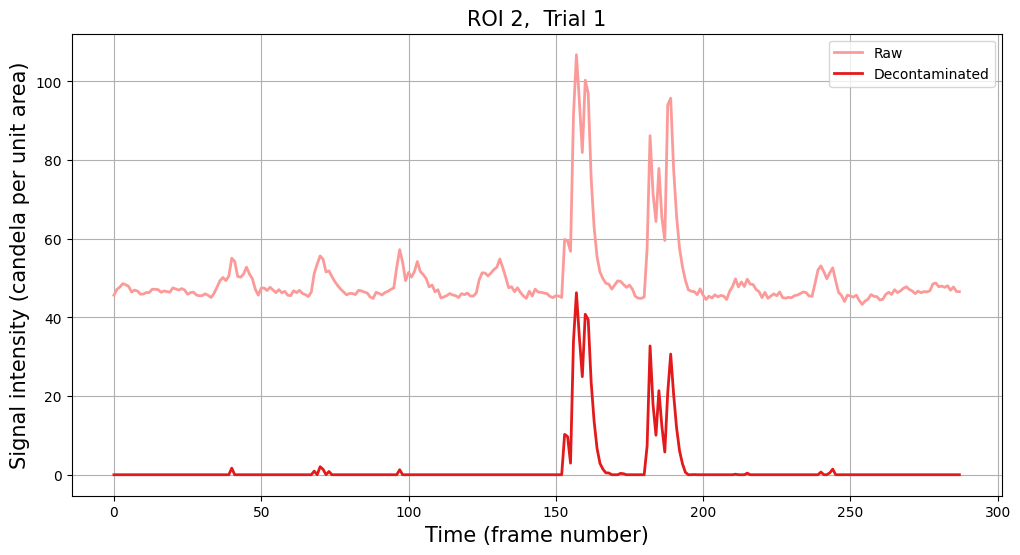

In [5]:
# Plot sample trace

# Select the ROI and trial to plot
roi = 2
trial = 1

# Create the figure
plt.figure(figsize=(12, 6))

plt.plot(
    raw[roi, trial][0, :],
    lw=2,
    label="Raw",
    color=colors((roi * 2) % colors.N),
)
plt.plot(
    result[roi, trial][0, :],
    lw=2,
    label="Decontaminated",
    color=colors((roi * 2 + 1) % colors.N),
)

plt.title("ROI {},  Trial {}".format(roi, trial), fontsize=15)
plt.xlabel("Time (frame number)", fontsize=15)
plt.ylabel("Signal intensity (candela per unit area)", fontsize=15)
plt.grid()
plt.legend()
plt.show()

Let's next plot the traces across all ROIs and trials.

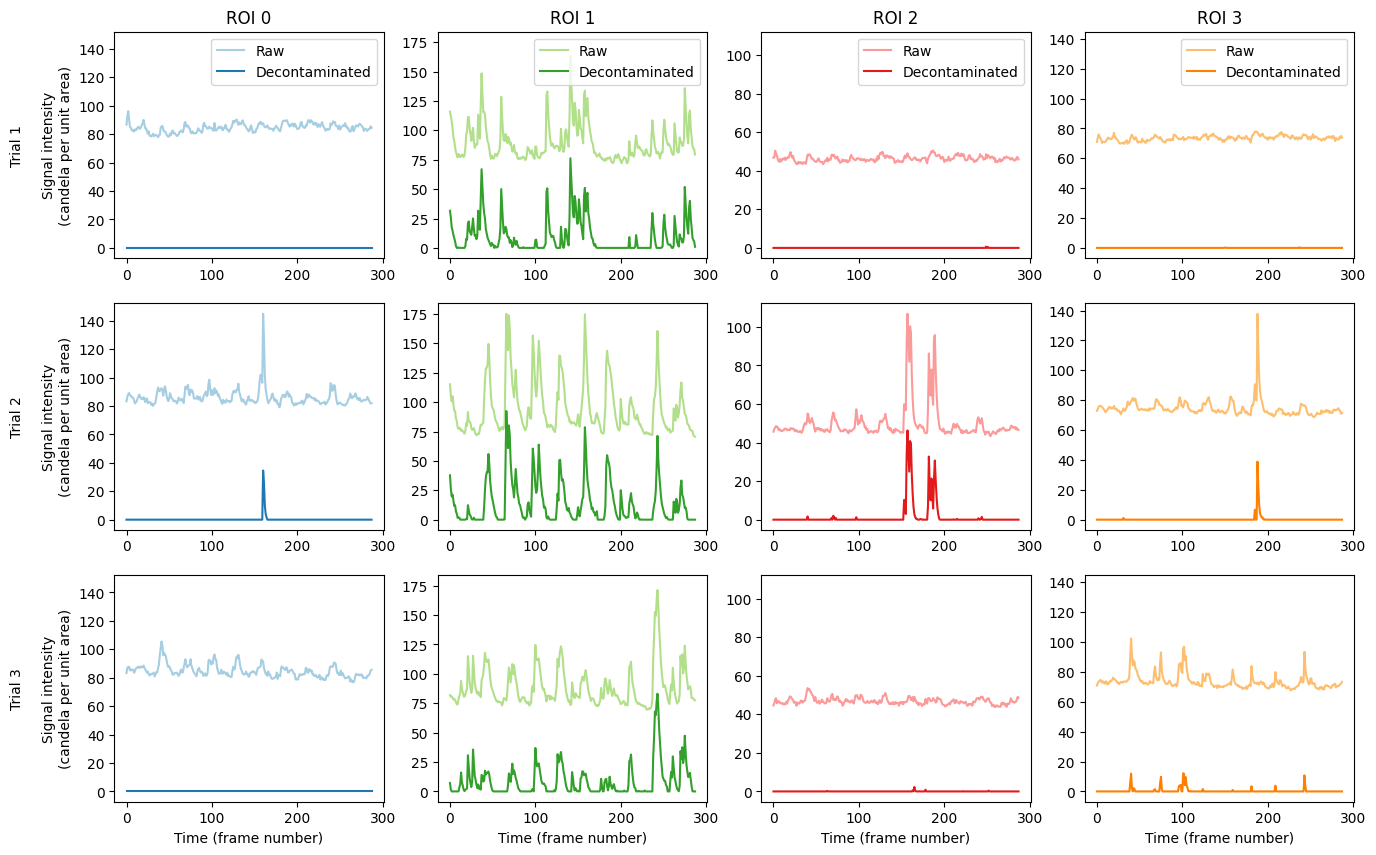

In [6]:
# Plot all ROIs and trials

# Get the number of ROIs and trials
n_roi = result.shape[0]
n_trial = result.shape[1]

# Find the maximum signal intensities for each ROI
roi_max_raw = [
    np.max([np.max(raw[i_roi, i_trial][0]) for i_trial in range(n_trial)])
    for i_roi in range(n_roi)
]
roi_max_result = [
    np.max([np.max(result[i_roi, i_trial][0]) for i_trial in range(n_trial)])
    for i_roi in range(n_roi)
]
roi_max = np.maximum(roi_max_raw, roi_max_result)

# Plot our figure using subplot panels
plt.figure(figsize=(16, 10))
for i_roi in range(n_roi):
    for i_trial in range(n_trial):
        # Make subplot axes
        i_subplot = 1 + i_trial * n_roi + i_roi
        plt.subplot(n_trial, n_roi, i_subplot)
        # Plot the data
        plt.plot(
            raw[i_roi][i_trial][0, :],
            label="Raw",
            color=colors((i_roi * 2) % colors.N),
        )
        plt.plot(
            result[i_roi][i_trial][0, :],
            label="Decontaminated",
            color=colors((i_roi * 2 + 1) % colors.N),
        )
        # Labels and boiler plate
        plt.ylim([-0.05 * roi_max[i_roi], roi_max[i_roi] * 1.05])
        if i_roi == 0:
            plt.ylabel(
                "Trial {}\n\nSignal intensity\n(candela per unit area)".format(
                    i_trial + 1
                )
            )
        if i_trial == 0:
            plt.title("ROI {}".format(i_roi))
            plt.legend()
        if i_trial == n_trial - 1:
            plt.xlabel("Time (frame number)")

plt.show()

### Comparing ROI signal to neuropil region signals
It can be very instructive to compare the signal in the central ROI with the surrounding neuropil regions. These can be found for cell `c` and trial `t` in `raw[c, t][i, :]`, with `i=0` being the cell, and `i=1,2,3,...` indicating the surrounding regions.

Below we compare directly the raw ROI trace, the decontaminated trace, and the surrounding neuropil region traces.

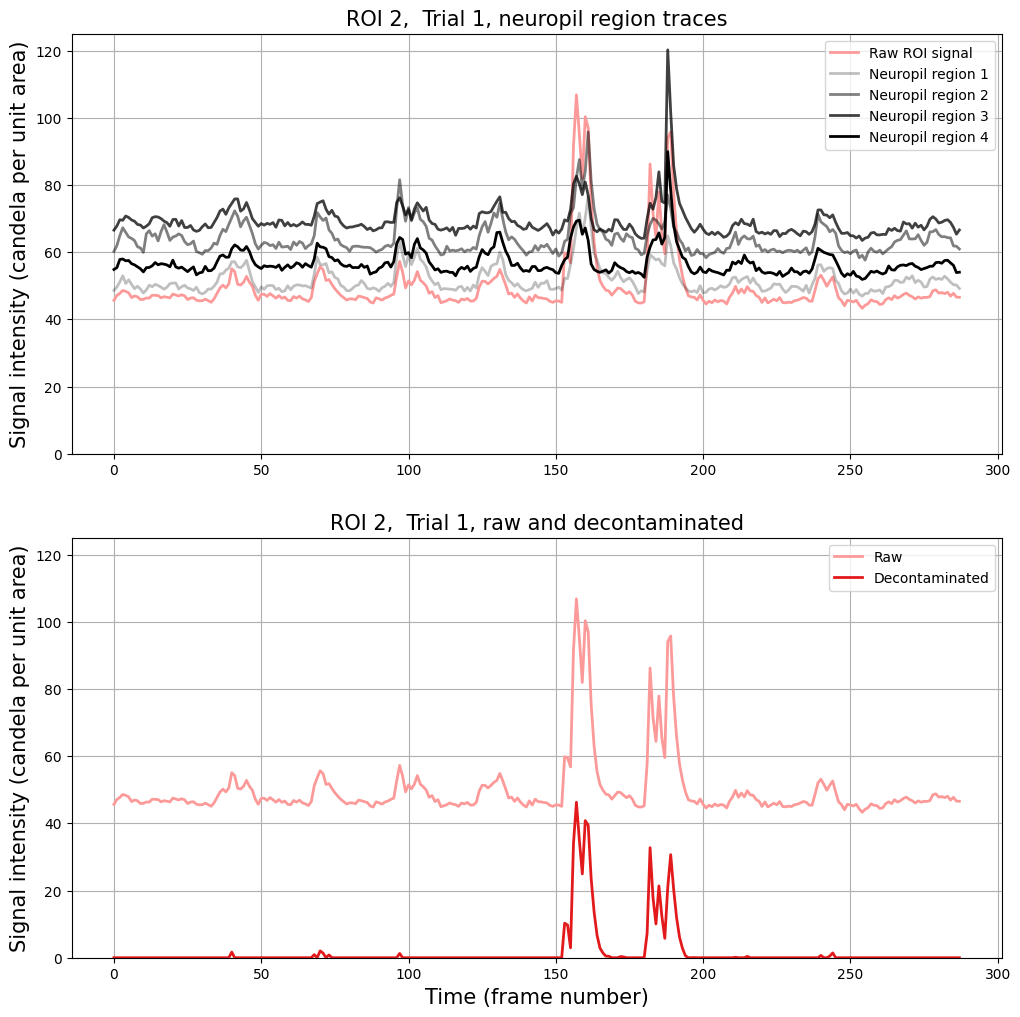

In [7]:
# Get the number of neuropil/surrounding regions.
# The raw data has the raw ROI signal in raw[:, :][0] and raw surround
# signals in the rest of the 3rd dimension.
nRegions = raw[0, 0].shape[0] - 1

# Select the ROI and trial to plot
roi = 2
trial = 1

# Create the figure
plt.figure(figsize=(12, 12))

# Plot extracted traces for each neuropil subregion
plt.subplot(2, 1, 1)
# Plot trace of raw ROI signal
plt.plot(
    raw[roi, trial][0, :],
    lw=2,
    label="Raw ROI signal",
    color=colors((roi * 2) % colors.N),
)
# Plot traces from each neuropil region
for i_neuropil in range(1, nRegions + 1):
    alpha = i_neuropil / nRegions
    plt.plot(
        raw[roi, trial][i_neuropil, :],
        lw=2,
        label="Neuropil region {}".format(i_neuropil),
        color="k",
        alpha=alpha,
    )
plt.ylim([0, 125])
plt.grid()
plt.legend()
plt.ylabel("Signal intensity (candela per unit area)", fontsize=15)
plt.title("ROI {},  Trial {}, neuropil region traces".format(roi, trial), fontsize=15)

# Plot the ROI signal
plt.subplot(2, 1, 2)
# Plot trace of raw ROI signal
plt.plot(raw[roi, trial][0, :], lw=2, label="Raw", color=colors((roi * 2) % colors.N))
# Plot decontaminated signal matched to the ROI
plt.plot(
    result[roi, trial][0, :],
    lw=2,
    label="Decontaminated",
    color=colors((roi * 2 + 1) % colors.N),
)

plt.ylim([0, 125])
plt.grid()
plt.legend()
plt.xlabel("Time (frame number)", fontsize=15)
plt.ylabel("Signal intensity (candela per unit area)", fontsize=15)
plt.title("ROI {},  Trial {}, raw and decontaminated".format(roi, trial), fontsize=15)

plt.show()

### df/f<sub>0</sub>

The default output from `fissa.run_fissa` is in the same units as the raw input (candelas per unit area).

It is often desirable to calculate the intensity of a signal relative to the baseline value, df/f<sub>0</sub>, for the traces.
`fissa.run_fissa` will do this for you provide the argument `return_deltaf=True`, and the sampling frequency of your TIFF files with `freq=sample_frequency`.
The sampling frequency must be provided because the data is smoothed in order to determine the baseline value f<sub>0</sub>.

When `return_deltaf=True`, `run_fissa` will return the df/f<sub>0</sub> output *instead* of the source signal traces scaled at the recording intensity.
If you need to access both the standard FISSA output *and* the df/f<sub>0</sub> output at the same time, you need to use the more flexible [fissa.Experiment](https://fissa.readthedocs.io/en/stable/source/packages/fissa.core.html#fissa.core.Experiment) FISSA interface instead, as described in [this example](https://fissa.readthedocs.io/en/latest/examples/Basic%20usage.html#df/f0).

In [8]:
sample_frequency = 10  # Hz

deltaf_result, deltaf_raw = fissa.run_fissa(
    images_location, rois_location, freq=sample_frequency, return_deltaf=True
)

Extracting traces:   0%|          | 0/3 [00:00<?, ?it/s]

Finished extracting raw signals from 4 ROIs across 3 trials in 0.970 seconds.


Separating data:   0%|          | 0/4 [00:00<?, ?it/s]

Finished separating signals from 4 ROIs across 3 trials in 1.605 seconds


Calculating Δf/f0:   0%|          | 0/4 [00:00<?, ?it/s]

Finished calculating Δf/f0 for raw and result signals in 0.018 seconds


Note that by default, f<sub>0</sub> is determined as the minimum across all trials (all TIFFs) to ensure that results are directly comparable between trials, but you can normalise each trial individually instead if you prefer by providing the parameter `deltaf_across_trials=False`.

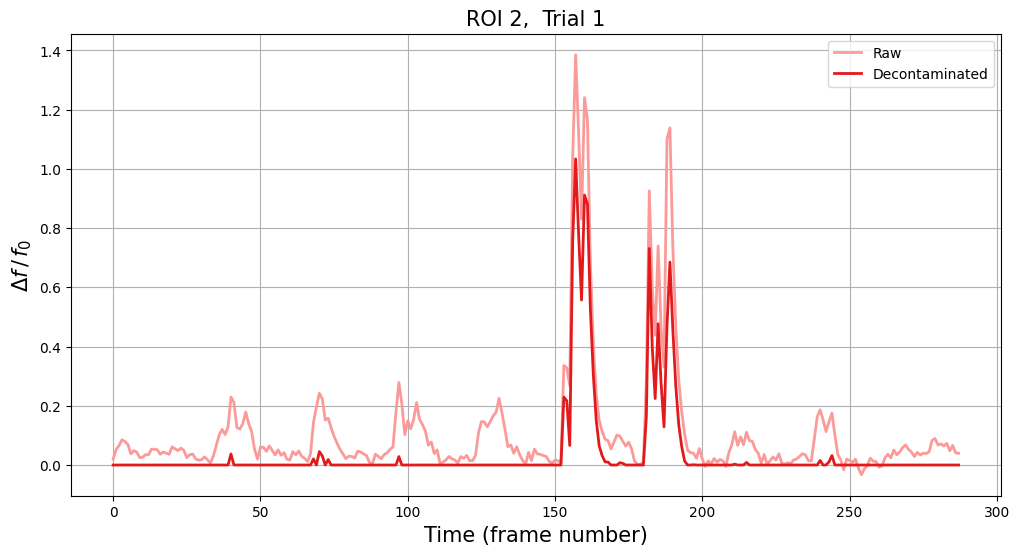

In [9]:
# Plot sample trace

# Select the ROI and trial to plot
roi = 2
trial = 1

# Create the figure
plt.figure(figsize=(12, 6))

plt.plot(
    deltaf_raw[roi, trial][0, :],
    lw=2,
    label="Raw",
    color=colors((roi * 2) % colors.N),
)
plt.plot(
    deltaf_result[roi, trial][0, :],
    lw=2,
    label="Decontaminated",
    color=colors((roi * 2 + 1) % colors.N),
)

plt.title("ROI {},  Trial {}".format(roi, trial), fontsize=15)
plt.xlabel("Time (frame number)", fontsize=15)
plt.ylabel(r"$\Delta f\,/\,f_0$", fontsize=15)
plt.grid()
plt.legend()
plt.show()

Since FISSA is very good at removing contamination from the ROI signals, the minimum value on the decontaminated trace will typically be `0.`.
Consequently, we use the minimum value of the (smoothed) raw signal to provide the f<sub>0</sub> from the raw trace for both the raw and decontaminated df/f<sub>0</sub>.

We can plot the df/f<sub>0</sub> for every cell during every trial as follows.

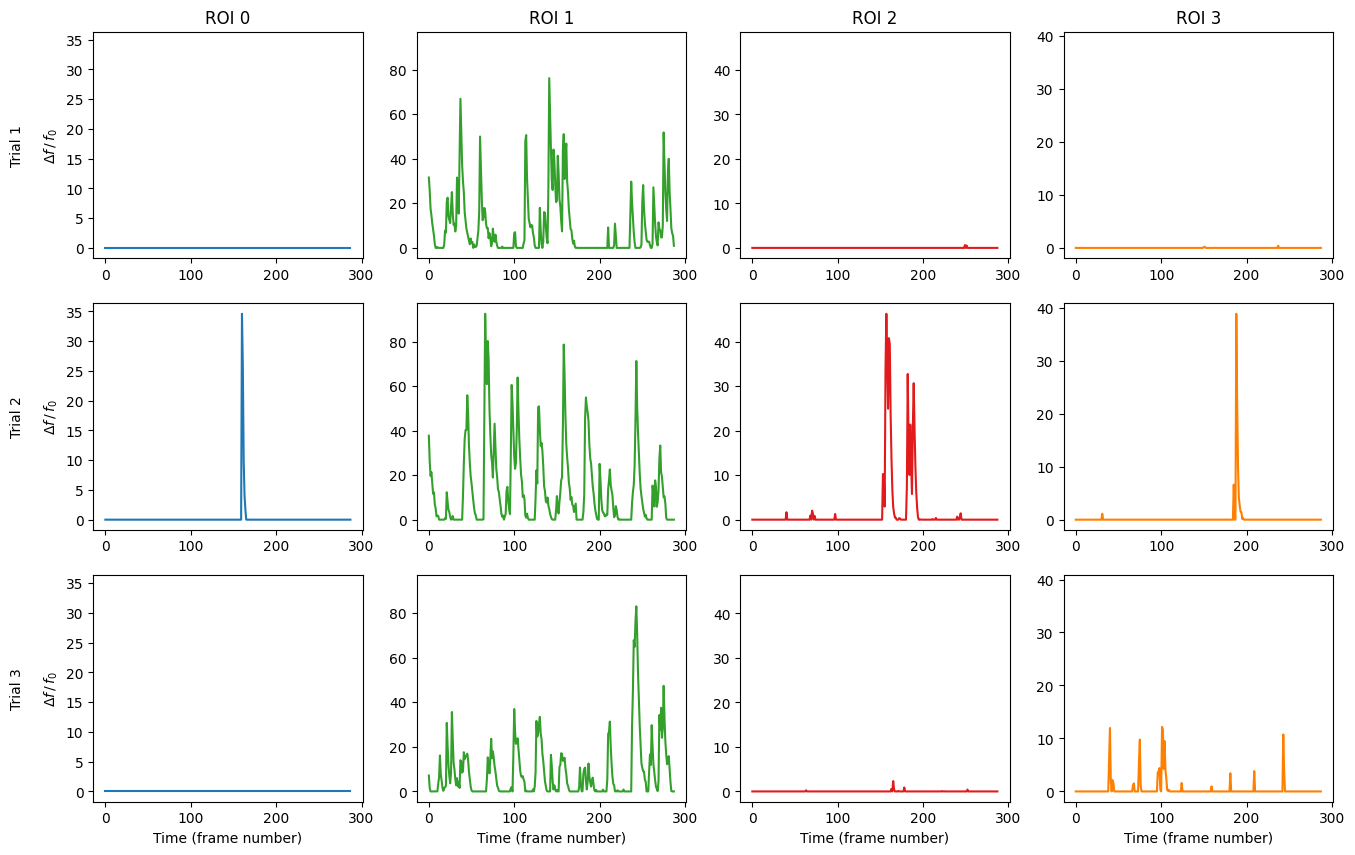

In [10]:
# Get the number of ROIs and trials
n_roi = result.shape[0]
n_trial = result.shape[1]

# Find the maximum signal intensities for each ROI,
# so we can scale ylim the same across subplots
roi_max = [
    np.max([np.max(result[i_roi, i_trial][0]) for i_trial in range(n_trial)])
    for i_roi in range(n_roi)
]

# Plot our figure using subplot panels
plt.figure(figsize=(16, 10))
for i_roi in range(n_roi):
    for i_trial in range(n_trial):
        # Make subplot axes
        i_subplot = 1 + i_trial * n_roi + i_roi
        plt.subplot(n_trial, n_roi, i_subplot)
        # Plot the data
        plt.plot(
            result[i_roi][i_trial][0, :],
            color=colors((i_roi * 2 + 1) % colors.N),
        )
        # Labels and boiler plate
        plt.ylim([-0.05 * roi_max[i_roi], roi_max[i_roi] * 1.05])
        if i_roi == 0:
            plt.ylabel("Trial {}\n\n".format(i_trial + 1) + r"$\Delta f\,/\,f_0$")
        if i_trial == 0:
            plt.title("ROI {}".format(i_roi))
        if i_trial == n_trial - 1:
            plt.xlabel("Time (frame number)")

plt.show()

For comparison purposes, we can also plot the df/f<sub>0</sub> for the raw data against the decontaminated signal.

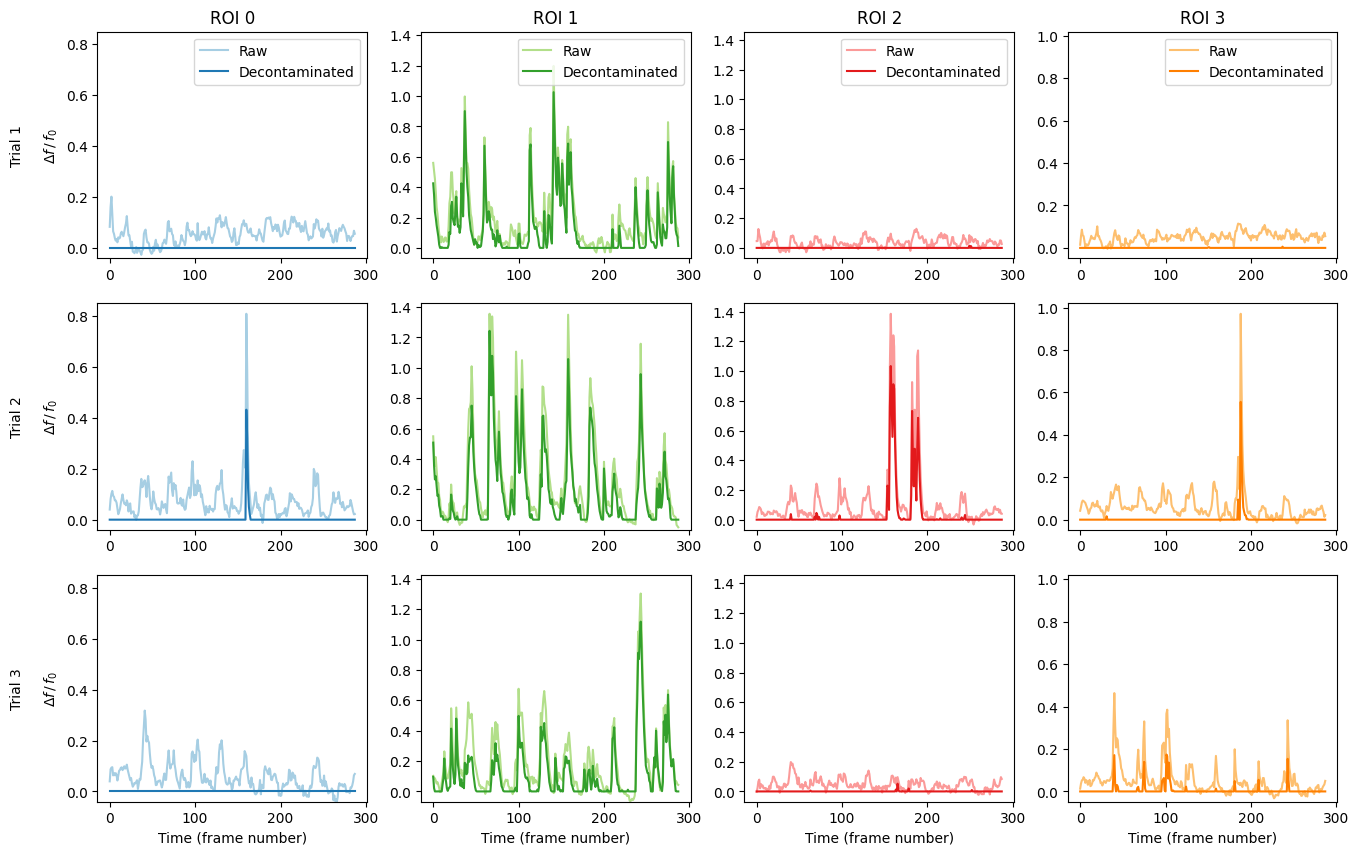

In [11]:
# Plot all ROIs and trials

# Get the number of ROIs and trials
n_roi = deltaf_result.shape[0]
n_trial = deltaf_result.shape[1]

# Find the maximum signal intensities for each ROI
roi_max_raw = [
    np.max([np.max(deltaf_raw[i_roi, i_trial][0]) for i_trial in range(n_trial)])
    for i_roi in range(n_roi)
]
roi_max_result = [
    np.max([np.max(deltaf_result[i_roi, i_trial][0]) for i_trial in range(n_trial)])
    for i_roi in range(n_roi)
]
roi_max = np.maximum(roi_max_raw, roi_max_result)

# Plot our figure using subplot panels
plt.figure(figsize=(16, 10))
for i_roi in range(n_roi):
    for i_trial in range(n_trial):
        # Make subplot axes
        i_subplot = 1 + i_trial * n_roi + i_roi
        plt.subplot(n_trial, n_roi, i_subplot)
        # Plot the data
        plt.plot(
            deltaf_raw[i_roi][i_trial][0, :],
            label="Raw",
            color=colors((i_roi * 2) % colors.N),
        )
        plt.plot(
            deltaf_result[i_roi][i_trial][0, :],
            label="Decontaminated",
            color=colors((i_roi * 2 + 1) % colors.N),
        )
        # Labels and boiler plate
        plt.ylim([-0.05 * roi_max[i_roi], roi_max[i_roi] * 1.05])
        if i_roi == 0:
            plt.ylabel("Trial {}\n\n".format(i_trial + 1) + r"$\Delta f\,/\,f_0$")
        if i_trial == 0:
            plt.title("ROI {}".format(i_roi))
            plt.legend()
        if i_trial == n_trial - 1:
            plt.xlabel("Time (frame number)")

plt.show()

## Caching

After using FISSA to decontaminate the data collected in an experiment, you will probably want to save the output for later use, so you don't have to keep re-running FISSA on the data.

To facilitate this, an option to cache the outputs is built into FISSA.
If you provide ``fissa.run_fissa`` with an identifier to the experiment being analysed in the ``folder`` argument, it will cache results into the corresponding directory.
Later, if you call ``fissa.run_fissa`` again with the same ``folder`` argument, it will load the saved results from that cache folder instead of recomputing them.

In [12]:
# Define the folder where FISSA's outputs will be cached, so they can be
# quickly reloaded in the future without having to recompute them.
#
# This argument is optional; if it is not provided, FISSA will not save its
# results for later use.
#
# If the output directory already exists, FISSA will load the contents of
# the cache instead of recomputing it.
#
# Note: you *must* use a different folder for each experiment, otherwise
# FISSA will load the existing data instead of computing results for the
# new experiment.
#
# In this example, we will use the current datetime as the  name of the
# experiment, but you can name your experiments however you want to.
# If you want to take advantage of the caching of results, you should use
# a more descriptive name than this so you can identify the actual
# dataset that the FISSA results correspond to, and load them appropriately.

import datetime

output_folder = "fissa-example_{}".format(
    datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
)

print(output_folder)

fissa-example_2025-02-25_03-57-10


Let's run FISSA on this experiment again, but this time save the results to the experiment's output directory.

In [13]:
# Run FISSA, saving to results to output_folder
result, raw = fissa.run_fissa(images_location, rois_location, folder=output_folder)

Extracting traces:   0%|          | 0/3 [00:00<?, ?it/s]

Finished extracting raw signals from 4 ROIs across 3 trials in 1.002 seconds.


Saving extracted traces to fissa-example_2025-02-25_03-57-10/prepared.npz


Separating data:   0%|          | 0/4 [00:00<?, ?it/s]

Finished separating signals from 4 ROIs across 3 trials in 1.704 seconds


Saving results to fissa-example_2025-02-25_03-57-10/separated.npz


A subsequent call to ``fissa.run_fissa`` which uses the same experiment folder argument will load the cached data instead of re-running the FISSA signal separation routine from scratch.

In [14]:
# Run FISSA, loading results from cache in output_folder
result, raw = fissa.run_fissa(images_location, rois_location, folder=output_folder)

Loading data from cache fissa-example_2025-02-25_03-57-10/prepared.npz
Loading data from cache fissa-example_2025-02-25_03-57-10/separated.npz
Loading data from cache fissa-example_2025-02-25_03-57-10/separated.npz


### Exporting to MATLAB

The results can easily be exported to a MATLAB-compatible [MAT-file](https://mathworks.com/help/matlab/import_export/mat-file-versions.html) as follows.

If we provide `export_to_matfile=True` to `fissa.run_fissa`, it will export the data a matfile named `"separated.mat"` within the cache directory (the cache directory as provided with the `folder` argument).

In [15]:
result, raw = fissa.run_fissa(
    images_location, rois_location, folder=output_folder, export_to_matfile=True
)

Loading data from cache fissa-example_2025-02-25_03-57-10/prepared.npz
Loading data from cache fissa-example_2025-02-25_03-57-10/separated.npz
Loading data from cache fissa-example_2025-02-25_03-57-10/separated.npz


Alternatively, we can export to a matfile with a custom file name by setting the `export_to_matfile` argument to the target path.

In [16]:
result, raw = fissa.run_fissa(
    images_location, rois_location, export_to_matfile="experiment_results.mat"
)

Extracting traces:   0%|          | 0/3 [00:00<?, ?it/s]

Finished extracting raw signals from 4 ROIs across 3 trials in 0.950 seconds.


Separating data:   0%|          | 0/4 [00:00<?, ?it/s]

Finished separating signals from 4 ROIs across 3 trials in 1.611 seconds


Loading the generated file (e.g. `"output_folder/separated.mat"`) in MATLAB will provide you with all of FISSA's outputs.

These are structured in the same way as the `raw` and `result` variables returned by `fissa.run_fissa`.
With the python interface, the outputs are 2d numpy.ndarrays each element of which is itself a 2d numpy.ndarrays.
Meanwhile, when the output is loaded into MATLAB the data is structured as a 2d cell-array each element of which is a 2d matrix.

Additionally, note that whilst Python indexes from 0, MATLAB indexes from 1 instead.
As a consequence of this, the results seen on Python for a given roi and trial `experiment.result[roi, trial]` correspond to the index `S.result{roi + 1, trial + 1}` on MATLAB.

Our first plot in this notebook can be replicated in MATLAB as follows:
```octave
%% Plot example traces in MATLAB
% Load FISSA output data in MATLAB
% ... either from the automatic file name within a cache
% S = load('fissa-example/separated.mat')
% ... or from a custom output path
S = load('experiment_results.mat')
% Select the second trial
% (On Python, this would be trial = 1)
trial = 2;
% Plot the result traces for each ROI
figure;
hold on;
for i_roi = 1:size(S.result, 1);
    plot(S.result{i_roi, trial}(1, :));
end
xlabel('Time (frame number)');
ylabel('Signal intensity (candela per unit area)');
grid on;
box on;
set(gca,'TickDir','out');
```

## Customisation

### Controlling verbosity

The level of verbosity of FISSA can be controlled with the `verbosity` parameter.

The default is `verbosity=1`.

If the verbosity parameter is higher, FISSA will print out more information while it is processing.
This can be helpful for debugging puproses.
The verbosity reaches its maximum at `verbosity=6`.

If `verbosity=0`, FISSA will run silently.

In [17]:
# Call FISSA with elevated verbosity
result = fissa.run_fissa(images_location, rois_location, verbosity=2)

Doing region growing and data extraction for 3 trials...
  Images:
    exampleData/20150529/AVG_A01.tif
    exampleData/20150529/AVG_A02.tif
    exampleData/20150529/AVG_A03.tif
  ROI sets:
    exampleData/20150429.zip
    exampleData/20150429.zip
    exampleData/20150429.zip
  nRegions: 4
  expansion: 1


Extracting traces:   0%|          | 0/3 [00:00<?, ?it/s]

Finished extracting raw signals from 4 ROIs across 3 trials in 0.912 seconds.


Doing signal separation for 4 ROIs over 3 trials...
  method: 'nmf'
  alpha: 0.1
  max_iter: 20000
  max_tries: 1
  tol: 0.0001


Separating data:   0%|          | 0/4 [00:00<?, ?it/s]

Finished separating signals from 4 ROIs across 3 trials in 1.579 seconds


### Analysis parameters

FISSA has several user-definable settings, which can be set as optional arguments to `fissa.run_fissa`.

In [18]:
# FISSA uses multiprocessing to speed up its processing.
# By default, it will spawn one worker per CPU core on your machine.
# However, if you have a lot of cores and not much memory, you many not
# be able to suport so many workers simultaneously.
# In particular, this can be problematic during the data preparation step
# in which TIFFs are loaded into memory.
# The default number of cores for the data preparation and separation steps
# can be changed as follows.
ncores_preparation = 4  # If None, uses all available cores
ncores_separation = None  # if None, uses all available cores

# By default, FISSA uses 4 subregions for the neuropil region.
# If you have very dense data with a lot of different signals per unit area,
# you may wish to increase the number of regions.
n_regions = 8

# By default, each surrounding region has the same area as the central ROI.
# i.e. expansion = 1
# However, you may wish to increase or decrease this value.
expansion = 0.75

# The degree of signal sparsity can be controlled with the alpha parameter.
alpha = 0.02

# If you change the experiment parameters, you need to change the cache directory too.
# Otherwise FISSA will try to reload the results from the previous run instead of
# computing the new results. FISSA will throw an error if you try to load data which
# was generated with different analysis parameters to the current parameters.
output_folder2 = output_folder + "_alt"

# Run FISSA with these parameters
result, raw = fissa.run_fissa(
    images_location,
    rois_location,
    output_folder2,
    nRegions=n_regions,
    expansion=expansion,
    alpha=alpha,
    ncores_preparation=ncores_preparation,
    ncores_separation=ncores_separation,
)

Extracting traces:   0%|          | 0/3 [00:00<?, ?it/s]

Finished extracting raw signals from 4 ROIs across 3 trials in 0.989 seconds.


Saving extracted traces to fissa-example_2025-02-25_03-57-10_alt/prepared.npz


Separating data:   0%|          | 0/4 [00:00<?, ?it/s]

Finished separating signals from 4 ROIs across 3 trials in 4.63 seconds


Saving results to fissa-example_2025-02-25_03-57-10_alt/separated.npz


We can plot the new results for our example trace from before. Although we doubled the number of neuropil regions around the cell, very little has changed for this example because there were not many sources of contamination.

However, there will be more of a difference if your data has more neuropil sources per unit area within the image.

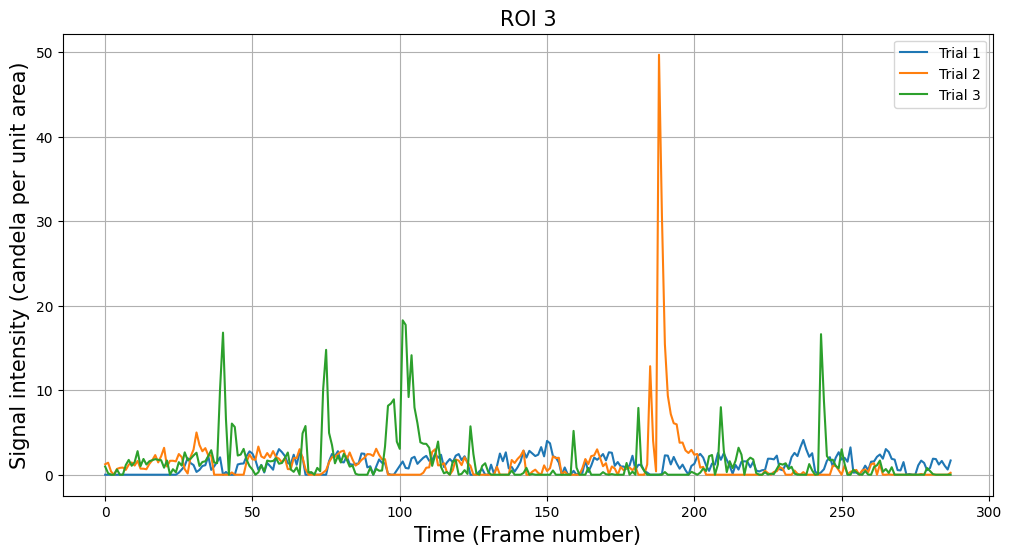

In [19]:
n_roi = result.shape[0]
n_trial = result.shape[1]

i_roi = 3

plt.figure(figsize=(12, 6))

for i_trial in range(n_trial):
    plt.plot(result[i_roi, i_trial][0, :], label="Trial {}".format(i_trial + 1))

plt.title("ROI {}".format(i_roi), fontsize=15)
plt.xlabel("Time (Frame number)", fontsize=15)
plt.ylabel("Signal intensity (candela per unit area)", fontsize=15)
plt.grid()
plt.legend()
plt.show()

## Working with very large tiff files

By default, FISSA loads entire TIFF files into memory at once and then manipulates all ROIs within the TIFF.
This is more efficient, but can be problematic when working with very large TIFF files which are too big to be loaded into memory all at once.

If you run out of memory when running FISSA, you can try reducing the number of workers during the memory-intensive preparation step.

In [20]:
result = fissa.run_fissa(images_location, rois_location, ncores_preparation=1)

Extracting traces:   0%|          | 0/3 [00:00<?, ?it/s]

Finished extracting raw signals from 4 ROIs across 3 trials in 0.403 seconds.


Separating data:   0%|          | 0/4 [00:00<?, ?it/s]

Finished separating signals from 4 ROIs across 3 trials in 1.089 seconds


Alternatively, you can activate FISSA's low memory mode.
In this mode, it will load and process frames one at a time.
This will run a fair bit slower than the default mode, but has a much lower memory requirement.

In [21]:
result, raw = fissa.run_fissa(images_location, rois_location, lowmemory_mode=True)

Extracting traces:   0%|          | 0/3 [00:00<?, ?it/s]

Finished extracting raw signals from 4 ROIs across 3 trials in 2.78 seconds.


Separating data:   0%|          | 0/4 [00:00<?, ?it/s]

Finished separating signals from 4 ROIs across 3 trials in 3.45 seconds
